# Exploratory Data analysis

## Data Loading

Installing data analysis packages/libraries and loading csv datafile using url

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://data.winnipeg.ca/api/views/d4mq-wa44/rows.csv?accessType=DOWNLOAD"
ds = pd.read_csv(url)
ds

C:\Users\mpipmeh\AppData\Local\Temp\ipykernel_26672\101105628.py:7: DtypeWarning: Columns (2,3,4,39,40,42,43,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(url)


,Roll Number,Street Number,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,...,Proposed Assessment Value 4,Proposed Property Class 5,Proposed Status 5,Proposed Assessment Value 5,Multiple Residences,Geometry,Dwelling Units,Centroid Lat,Centroid Lon,GISID
0,1000001000,1636.0,NaN,NaN,NaN,MCCREARY,ROAD,1636 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23311670618891 49.83063124...,1.0,49.830137,-97.234696,148170
1,1000005500,1584.0,NaN,NaN,NaN,MCCREARY,ROAD,1584 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.2361802081971 49.831882231...,1.0,49.831649,-97.234565,148168
2,1000008000,1574.0,NaN,NaN,NaN,MCCREARY,ROAD,1574 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23616667174454 49.83203713...,1.0,49.832113,-97.234524,185348
3,1000008200,1550.0,NaN,NaN,NaN,MCCREARY,ROAD,1550 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23612611966252 49.83250120...,1.0,49.832423,-97.234497,185347
4,1000008400,1538.0,NaN,NaN,NaN,MCCREARY,ROAD,1538 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23608555720466 49.83296537...,1.0,49.832887,-97.234457,185346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244589,14900060200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.17275619648407 49.93486227...,0.0,49.934936,-97.171709,513013
244590,14900060400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.17157232901594 49.93652079...,0.0,49.936043,-97.171610,513022
244591,14900060600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.19004033343711 49.94462530...,0.0,49.944469,-97.191702,3488
244592,14900060800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.19320289223693 49.94462815...,0.0,49.944374,-97.194047,3487


In [30]:
# displaying summary of the data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244594 entries, 0 to 244593
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Roll Number                      244594 non-null  int64  
 1   Street Number                    239686 non-null  float64
 2   Unit Number                      27101 non-null   object 
 3   Street Suffix                    627 non-null     object 
 4   Street Direction                 12077 non-null   object 
 5   Street Name                      241374 non-null  object 
 6   Street Type                      240708 non-null  object 
 7   Full Address                     241379 non-null  object 
 8   Neighbourhood Area               244594 non-null  object 
 9   Market Region                    244594 non-null  object 
 10  Total Living Area                219448 non-null  float64
 11  Building Type                    193096 non-null  object 
 12  Ba

# Cleaning

Dropping columns with 0 non-null values

In [3]:
# Identify columns with 0 non-null values
empty_columns = ds.columns[ds.isnull().all()].tolist()

# Drop all empty columns except the one to keep
columns_to_drop = [col for col in empty_columns ] #if col != column_to_keep
ds = ds.drop(columns=columns_to_drop)

### Comments

Identified few numerical columns that were of data type 'object'. 
They have some speical characters like Dollar sign, comma etc that needs to be stripped.

After scrubbing, the descriptive statistics of numerical columns is as following,

## Descriptive statistics for numerical columns

In [5]:
# Numeric columns with special characters that need cleaning
columns_to_clean = ['Street Number','Total Living Area','Total Assessed Value','Assessed Land Area','Water Frontage Measurement','Sewer Frontage Measurement',
                    'GISID','Roll Number','Dwelling Units','Current Assessment Year']

# Add median separately since it's not included in describe()
descriptive_stats.loc['median'] = ds.median()

# Remove the dollar sign and convert to float
ds[columns_to_clean] = ds[columns_to_clean].replace('[\$,]', '', regex=True).astype(float)
ds.describe()

,Roll Number,Street Number,Total Living Area,Year Built,Rooms,Number Floors (Condo),Assessed Land Area,Water Frontage Measurement,Sewer Frontage Measurement,Total Assessed Value,Current Assessment Year,Dwelling Units,Centroid Lat,Centroid Lon,GISID
count,2.445960e+05,239687.000000,219448.000000,219448.000000,219440.000000,26351.000000,2.162840e+05,235460.000000,235176.000000,2.436860e+05,244596.0,243686.000000,244596.000000,244596.000000,244596.000000
mean,7.798646e+09,423.407536,1304.456386,1968.808428,5.932592,1.255133,1.846150e+04,51.494831,50.844832,5.340561e+05,2026.0,1.354587,49.879442,-97.144908,230010.524702
std,4.027374e+09,608.476884,520.146639,32.215878,1.475695,0.522428,3.364426e+05,132.972830,116.637497,2.777010e+06,0.0,7.217007,0.049254,0.074713,217898.345922
min,1.000001e+09,0.000000,260.000000,1870.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,2026.0,0.000000,49.721402,-97.342436,1196.000000
25%,4.007064e+09,63.000000,960.000000,1950.000000,5.000000,1.000000,3.995000e+03,31.000000,31.000000,2.550000e+05,2026.0,1.000000,49.845971,-97.188344,68368.750000
50%,7.552675e+09,208.000000,1170.000000,1972.000000,6.000000,1.000000,5.273000e+03,44.000000,44.000000,3.490000e+05,2026.0,1.000000,49.882526,-97.146821,132792.500000
75%,1.202308e+10,571.000000,1556.000000,1990.000000,7.000000,1.000000,6.577000e+03,54.000000,54.000000,4.660000e+05,2026.0,1.000000,49.917754,-97.094342,478880.000000
max,1.490006e+10,6775.000000,11197.000000,2025.000000,29.000000,4.000000,8.609344e+07,29661.500000,23295.000000,6.513160e+08,2026.0,925.000000,49.992849,-96.956861,656480.000000


# Comments:

Identified two outliers rows while manually reviewing the csv file 

In [6]:
# Changing the data type of 'Roll Number' to object in order to remove the long random roll number
ds['Roll Number'] = ds['Roll Number'].astype(object)

# List of record IDs to drop
roll_nos_to_drop = ['0107376627423 49.80160863413996', '9257376']

# Drop rows where record_id is in the list
ds = ds[~ds['Roll Number'].isin(roll_nos_to_drop)]

## Descriptive statistics of categorical columns

In [9]:
# Generate descriptive statistics for categorical columns
categorical_stats = ds.describe(include='object')
categorical_stats

,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,Building Type,Basement,...,Status 3,Assessed Value 3,Property Class 4,Status 4,Assessed Value 4,Property Class 5,Status 5,Assessed Value 5,Multiple Residences,Geometry
count,27101,627,12077,241376,240710,241381,244596,244596,193096,219974,...,99,99,12,12,12,2,2,2,221460,244596
unique,1992,12,4,4231,38,239690,237,10,11,2,...,5,98,3,4,11,2,2,2,2,216595
top,1,A,W,PEMBINA,AVENUE,MCCONNELL ROAD,RIVER PARK SOUTH,"8, FORT GARRY / LINDENWOODS",ONE STOREY,Yes,...,EXEMPT,"$104,000.00",FARM,FARM VALUE NOT ASSESSED,"$731,000.00",FARM,FARM VALUE NOT ASSESSED,"$481,000.00",No,MULTIPOLYGON (((-97.14984955744468 49.89797562...
freq,683,315,5965,1451,71124,75,4795,33363,92158,193829,...,45,2,7,7,2,1,1,1,220693,408


## Comments:

While going through the dataset, two rows were identified with arbitary values, '0107376627423 49.80160863413996' in all the columns, so they were dropped.

# Handling missing data

Numerical variables like Total Living Area, Rooms, Water Frontage Measurement, Sewer Frontage Measurement, Total Assessed Value were replaced by Median

Categorical Variable like Street Type, Building type, Basement, Basement Finish, Year Built were replaced by mode or by introducing new category "Missing". 

In [10]:
# calculating number of null values in each column
ds.isnull().sum()


Roll Number                        0
Street Number                   4909
Unit Number                   217495
Street Suffix                 243969
Street Direction              232519
Street Name                     3220
Street Type                     3886
Full Address                    3215
Neighbourhood Area                 0
Market Region                      0
Total Living Area              25148
Building Type                  51500
Basement                       24622
Basement Finish                23136
Year Built                     25148
Rooms                          25156
Air Conditioning               51499
Fire Place                     23136
Attached Garage                50040
Detached Garage                50040
Pool                           50040
Number Floors (Condo)         218245
Property Use Code                  0
Assessed Land Area             28312
Water Frontage Measurement      9136
Sewer Frontage Measurement      9420
Property Influences           127541
Z

In [11]:
# Drop the first unnamed column if it's just an index
if ds.columns[0].startswith('Unnamed'):
    ds = ds.iloc[:, 1:]

# Summary of missing values before imputation
missing_before = ds.isnull().sum()

# Separate numerical and categorical columns
numerical_cols = ds.select_dtypes(include=['number']).columns
categorical_cols = ds.select_dtypes(include=['object']).columns

# Handle missing values
# For numerical columns: median imputation
for col in numerical_cols:
    median_value = ds[col].median()
    ds[col].fillna(median_value, inplace=True)

# For categorical columns: mode imputation or 'Missing' category
for col in categorical_cols:
    mode_value = ds[col].mode()
    if not mode_value.empty:
        ds[col].fillna(mode_value[0], inplace=True)
    else:
        ds[col].fillna('Missing', inplace=True)

# Summary of missing values after imputation
missing_after = ds.isnull().sum()
missing_after

Roll Number                   0
Street Number                 0
Unit Number                   0
Street Suffix                 0
Street Direction              0
Street Name                   0
Street Type                   0
Full Address                  0
Neighbourhood Area            0
Market Region                 0
Total Living Area             0
Building Type                 0
Basement                      0
Basement Finish               0
Year Built                    0
Rooms                         0
Air Conditioning              0
Fire Place                    0
Attached Garage               0
Detached Garage               0
Pool                          0
Number Floors (Condo)         0
Property Use Code             0
Assessed Land Area            0
Water Frontage Measurement    0
Sewer Frontage Measurement    0
Property Influences           0
Zoning                        0
Total Assessed Value          0
Assessment Date               0
Detail URL                    0
Current 

# Comments:

The assignement asked for AVM for RESIDENTIAL PROPERTIES. So the column 'Property Use Code' is used to identify residential properties. 

In [12]:
# List all unique categories in the 'Property Use Code' column to identify residential properties only
unique_categories = ds['Property Use Code'].dropna().unique().tolist()
unique_categories

['RESSD - DETACHED SINGLE DWELLING',
 'AGRII - IMPROVED AGRICULTURAL',
 'VRES1 - VACANT RESIDENTIAL 1',
 'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
 'VAGRI - VACANT AGRICULTURAL',
 'RESSS - SIDE BY SIDE',
 'VAPRK - VACANT PARK',
 'CMOGV - GOVERNMENT OFFICE',
 'CNCMP - CONDO COMPLEX',
 'CNRES - CONDO RESIDENTIAL',
 'PIISC - SCHOOL',
 'RESAP - APARTMENTS',
 'PIICH - CHURCH',
 'CMRRE - RESTAURANT',
 'RESAM - APARTMENTS MULTIPLE USE',
 'PIINH - NURSING HOME',
 'INMMI - INDUSTRIAL MISCELLANEOUS',
 'INWWH - WAREHOUSE',
 'RESMU - RESIDENTIAL MULTIPLE USE',
 'CMRST - STORE',
 'CMOFF - OFFICE',
 'CMVSR - VEHICLE SERVICE RELATED',
 'RESMA - MULTIPLE ATTACHED UNITS',
 'CMSTP - STRIP MALL',
 'RESSU - RESIDENTIAL SECONDARY UNIT',
 'CNAPT - CONDO APARTMENT',
 'INMMU - INDUSTRIAL MULTIPLE USE',
 'RESOT - RESIDENTIAL OUTBUILDING',
 'CMRNS - NEIGHBOURHOOD SHOPPING CENTRE',
 'PIRCC - COMMUNITY CENTRE',
 'RESGC - RESIDENTIAL GROUP CARE',
 'HYDSS - HYDRO SUBSTATIONS',
 'STATR - STATUTORY RAILWAY ROADWAY',


In [13]:
# Categories to filter
categories_to_keep = ['RESSD - DETACHED SINGLE DWELLING', 'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
                     'RESSS - SIDE BY SIDE','RESSS - SIDE BY SIDE','RESMH - MOBILE HOME',
                      'RESRM - ROOMING HOUSE','RESDU - DUPLEX','RESTR - TRIPLEX','RESRH - ROW HOUSING',
                      'RESMC - MULTIFAMILY CONVERSION','RESGC - RESIDENTIAL GROUP CARE',
                      'RESOT - RESIDENTIAL OUTBUILDING','RESSU - RESIDENTIAL SECONDARY UNIT',
                      'RESMA - MULTIPLE ATTACHED UNITS','RESMU - RESIDENTIAL MULTIPLE USE',
                      'RESAM - APARTMENTS MULTIPLE USE','RESAP - APARTMENTS','CNRES - CONDO RESIDENTIAL'
                     ]

# Filter the DataFrame to include only rows with specified residential type
ds = ds[ds['Property Use Code'].isin(categories_to_keep)]

# Correlation analysis

In [14]:
# Select only numerical features for correlation analysis
numerical_dataset = ds.select_dtypes(include=['number'])
correlation=numerical_dataset.corr()
print(correlation['Total Assessed Value'].sort_values(ascending=False),'\n')

Total Assessed Value          1.000000
Dwelling Units                0.867385
Water Frontage Measurement    0.486141
Sewer Frontage Measurement    0.471360
Assessed Land Area            0.237351
Total Living Area             0.086779
GISID                         0.081298
Year Built                    0.078601
Rooms                         0.054523
Street Number                 0.006902
Centroid Lon                 -0.007346
Number Floors (Condo)        -0.013675
Roll Number                  -0.035670
Centroid Lat                 -0.049221
Current Assessment Year            NaN
Name: Total Assessed Value, dtype: float64 



# Comment:

As per correlation analysis, dropping column 'Current Assessment Year', 'GISD','Street number', 'Centroid Lon', 'Centroid Lat'.


In [15]:
Cols_to_drop = ['Street Number','Current Assessment Year','GISID','Centroid Lon','Centroid Lat']
ds = ds.drop(columns=Cols_to_drop)

<Axes: >

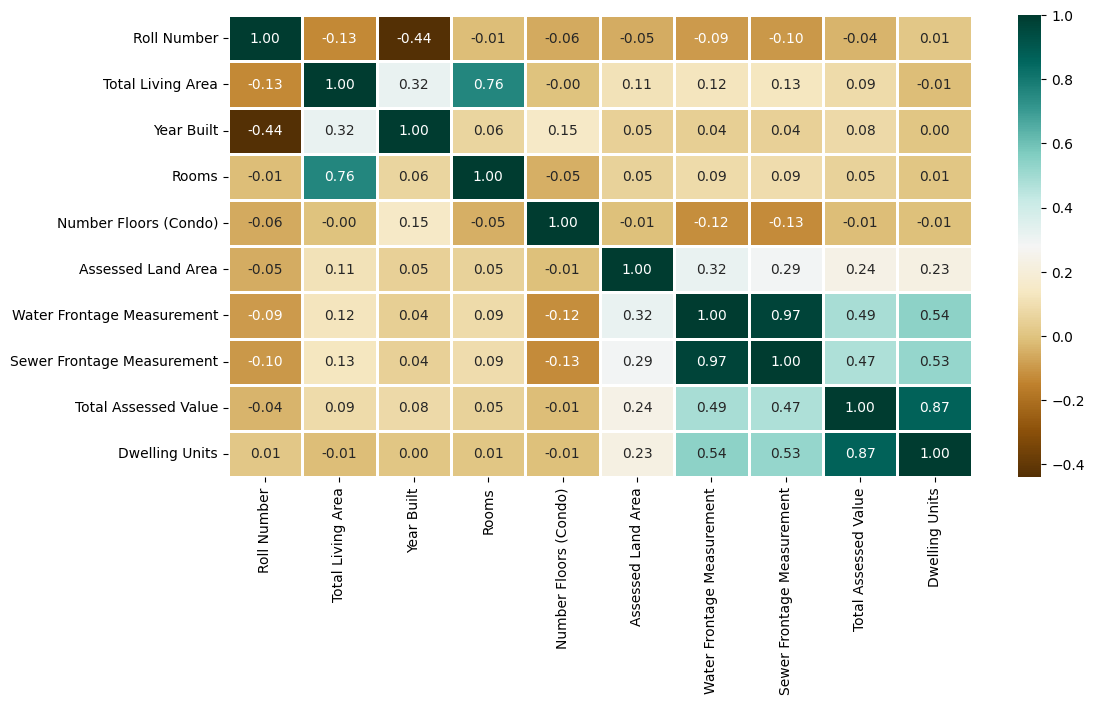

In [16]:
# Select only numerical features for correlation analysis
numerical_dataset = ds.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# Comments:

Identifying object, integer, float type columns and assigning them to different subsets

In [17]:
# identifying object type columns
obj = (ds.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

# identifying integer type columns
int_ = (ds.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

# identifying float type columns
fl = (ds.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 38
Integer variables: 0
Float variables: 10


# Comments: 
identifying number of unique categores each object type columns have.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

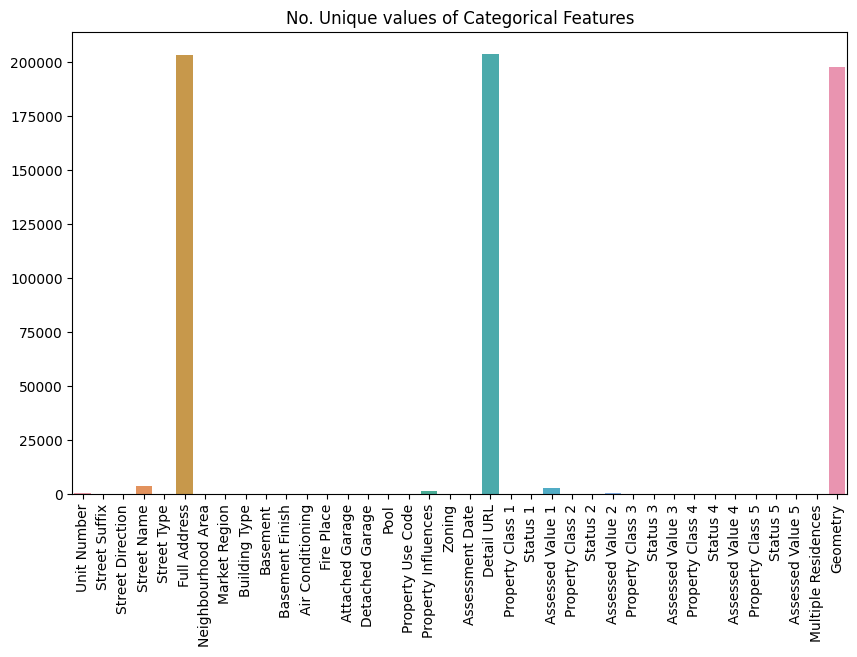

In [18]:
unique_values = []
for col in object_cols:
    unique_values.append(ds[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [19]:
category_counts = ds[object_cols].nunique()
category_counts

Unit Number               591
Street Suffix              11
Street Direction            4
Street Name              3965
Street Type                37
Full Address           203244
Neighbourhood Area        220
Market Region              10
Building Type              11
Basement                    2
Basement Finish             2
Air Conditioning            2
Fire Place                  2
Attached Garage             2
Detached Garage             2
Pool                        2
Property Use Code          17
Property Influences      1429
Zoning                     43
Assessment Date             1
Detail URL             203558
Property Class 1            6
Status 1                    4
Assessed Value 1         2831
Property Class 2            7
Status 2                    4
Assessed Value 2          366
Property Class 3            5
Status 3                    5
Assessed Value 3           21
Property Class 4            2
Status 4                    2
Assessed Value 4            2
Property C

# Comments:
 - Features with a large number of unique categories can be challenging to handle in machine learning models, as they might lead to high-dimensional data.The columns with more than 500 categories may not contribute to AVM. Hence they can be dropped. 
 - Also columns with 1 category were looked into manually in excel file. They were just sigular value against a proprty which would play no role in prediction modelling, so they are dropped.
 - Columns like Assessed Value, status, Property Class 1, 2,3,4,5 were dropped as we have a condensed column displaying the same values.

In [20]:
Cols_to_drop = ['Full Address','Geometry','Detail URL',
                'Assessed Value 1','Assessed Value 2','Assessed Value 3','Assessed Value 4',
                'Assessed Value 5','Property Class 1','Property Class 2','Property Class 3',
                'Property Class 4','Property Class 5','Status 1','Status 2','Status 3','Status 4',
                'Status 5','Roll Number','Unit Number','Street Name','Street Suffix','Dwelling Units',
                'Multiple Residences','Property Influences','Number Floors (Condo)']
ds = ds.drop(columns=Cols_to_drop)

In [28]:
ds

,Street Direction,Street Type,Neighbourhood Area,Market Region,Total Living Area,Building Type,Basement,Basement Finish,Year Built,Rooms,...,Attached Garage,Detached Garage,Pool,Property Use Code,Assessed Land Area,Water Frontage Measurement,Sewer Frontage Measurement,Zoning,Total Assessed Value,Assessment Date
0,W,ROAD,WILKES SOUTH,"6, CHARLESWOOD",1313.0,ONE STOREY,Yes,No,1991.0,5.0,...,No,Yes,No,RESSD - DETACHED SINGLE DWELLING,197030.0,44.00,44.00,A - AGRICULTURAL,723000.0,2023-04-01
1,W,ROAD,WILKES SOUTH,"6, CHARLESWOOD",4007.0,TWO STOREY,Yes,Yes,1991.0,8.0,...,Yes,No,No,RESSD - DETACHED SINGLE DWELLING,218155.0,44.00,44.00,A - AGRICULTURAL,1619000.0,2023-04-01
2,W,ROAD,WILKES SOUTH,"6, CHARLESWOOD",1052.0,ONE STOREY,No,No,2007.0,5.0,...,No,Yes,No,RESSD - DETACHED SINGLE DWELLING,43628.0,44.00,44.00,A - AGRICULTURAL,570000.0,2023-04-01
3,W,ROAD,WILKES SOUTH,"6, CHARLESWOOD",3120.0,ONE STOREY,Yes,No,1982.0,6.0,...,Yes,No,No,RESSD - DETACHED SINGLE DWELLING,130705.0,44.00,44.00,A - AGRICULTURAL,743000.0,2023-04-01
4,W,ROAD,WILKES SOUTH,"6, CHARLESWOOD",1510.0,ONE STOREY,Yes,Yes,1970.0,5.0,...,No,No,No,RESSD - DETACHED SINGLE DWELLING,130718.0,44.00,44.00,A - AGRICULTURAL,577000.0,2023-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244494,W,AVENUE,INKSTER GARDENS,"3, WEST KILDONAN / OLD KILDONAN",1778.0,ONE STOREY,No,No,2024.0,7.0,...,No,No,No,CNRES - CONDO RESIDENTIAL,5273.0,9.25,9.25,R1M - RES - S F - MEDIUM,206000.0,2023-04-01
244495,W,AVENUE,INKSTER GARDENS,"3, WEST KILDONAN / OLD KILDONAN",1744.0,ONE STOREY,No,No,2024.0,7.0,...,No,No,No,CNRES - CONDO RESIDENTIAL,5273.0,9.25,9.25,R1M - RES - S F - MEDIUM,202000.0,2023-04-01
244496,W,AVENUE,INKSTER GARDENS,"3, WEST KILDONAN / OLD KILDONAN",1744.0,ONE STOREY,No,No,2024.0,7.0,...,No,No,No,CNRES - CONDO RESIDENTIAL,5273.0,9.25,9.25,R1M - RES - S F - MEDIUM,202000.0,2023-04-01
244497,W,AVENUE,INKSTER GARDENS,"3, WEST KILDONAN / OLD KILDONAN",1744.0,ONE STOREY,No,No,2024.0,7.0,...,No,No,No,CNRES - CONDO RESIDENTIAL,5273.0,9.25,9.25,R1M - RES - S F - MEDIUM,407000.0,2023-04-01


# One- Hot Encoding for Categorical columns


- Low-Cardinality Categorical Columns (≤ 20 unique values)
These were one-hot encoded (converted into binary columns):

    - Market Region
    - Building Type
    - Basement
    - Basement Finish
    - Air Conditioning
    - Fire Place
    - Attached Garage
    - Detached Garage
    - Pool
    - Property Use Code

- High-Cardinality Categorical Columns (> 20 unique values)
These were frequency encoded (replaced with the count of each category's occurrence):

    - Street Type
    - Neighbourhood Area
    - Zoning

In [21]:
from sklearn.preprocessing import LabelEncoder

# Drop unnamed index column if present
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]

# Identify categorical columns (object or bool types)
categorical_cols = ds.select_dtypes(include=['object', 'bool']).columns.tolist()

# Count unique categories in each categorical column
category_counts = ds[categorical_cols].nunique()

# Separate columns into low and high cardinality
low_cardinality = category_counts[category_counts <= 20].index.tolist()
high_cardinality = category_counts[category_counts > 20].index.tolist()

# One-hot encode low-cardinality categorical columns
df_encoded = pd.get_dummies(ds, columns=low_cardinality, drop_first=True)

# Frequency encode high-cardinality categorical columns
for col in high_cardinality:
    freq_encoding = ds[col].value_counts()
    df_encoded[col + '_freq'] = ds[col].map(freq_encoding)

# Drop original high-cardinality columns
df_encoded.drop(columns=high_cardinality, inplace=True)

# Feature Selection, Prediction model and performance

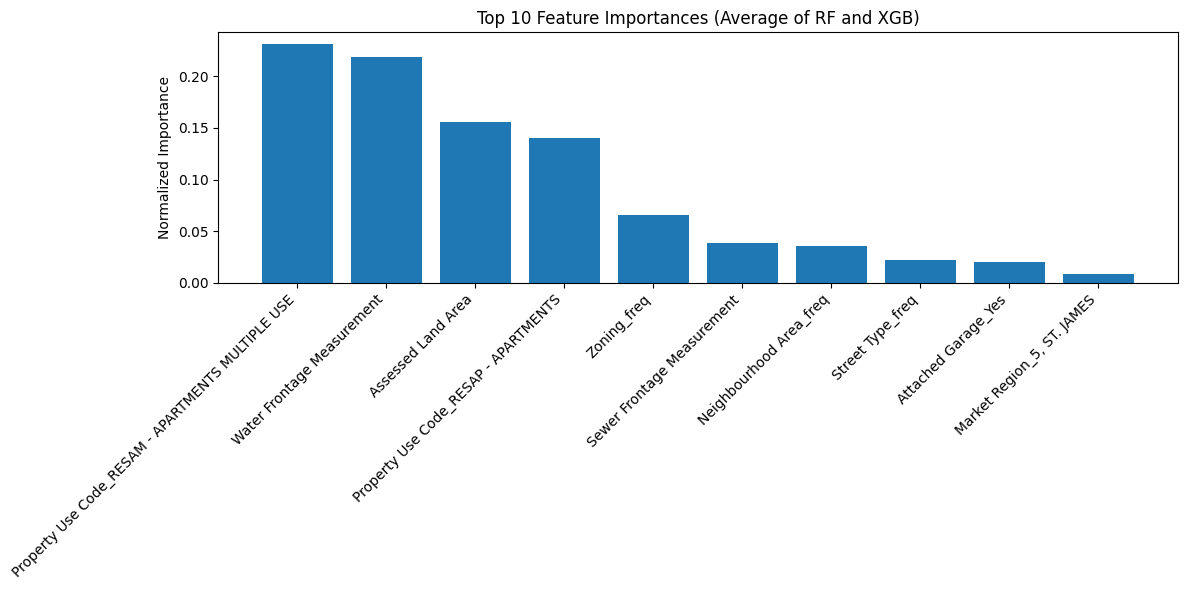

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt



# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=["Total Assessed Value"])

# Select numerical features only
numerical_features = df_encoded.select_dtypes(include=[np.number]).drop(columns=["Total Assessed Value"])
X = numerical_features
y = df_encoded["Total Assessed Value"]

# Define scalers
scalers = {
    "MinMax": MinMaxScaler(),
    "ZScore": StandardScaler()
}

# Define models
models = {
    "RF": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    "XGB": XGBRegressor(random_state=42),
    "LR": LinearRegression()
}

# Store performance metrics
performance = []

# Evaluate each model with each scaling method
for scale_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        nrmse = np.sqrt(mean_squared_error(y_test, y_pred)) / (y.max() - y.min())

        performance.append({
            "Model": f"{model_name}-{scale_name}",
            "R²": round(r2, 3),
            "MAPE": round(mape, 3),
            "nRMSE": round(nrmse, 3)
        })

# Create performance comparison table
performance_df = pd.DataFrame(performance)

# Save the table to CSV
performance_df.to_csv("model_performance_comparison.csv", index=False)

# Plot feature importances for RF and XGB
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
xgb_model = XGBRegressor(random_state=42)

rf_model.fit(X_scaled, y)
xgb_model.fit(X_scaled, y)

rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

# Normalize importances
rf_norm = rf_importance / rf_importance.sum()
xgb_norm = xgb_importance / xgb_importance.sum()

# Average importance
avg_importance = (rf_norm + xgb_norm) / 2

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "RF Importance": rf_norm,
    "XGB Importance": xgb_norm,
    "Average Importance": avg_importance
}).sort_values(by="Average Importance", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(importance_df["Feature"][:10], importance_df["Average Importance"][:10])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Feature Importances (Average of RF and XGB)")
plt.ylabel("Normalized Importance")
plt.tight_layout()
plt.savefig("feature_importance_comparison.png")

# Save importance table
importance_df.to_csv("feature_importance_comparison.csv", index=False)


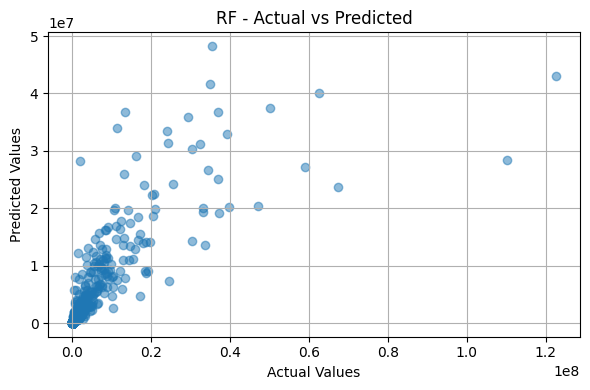

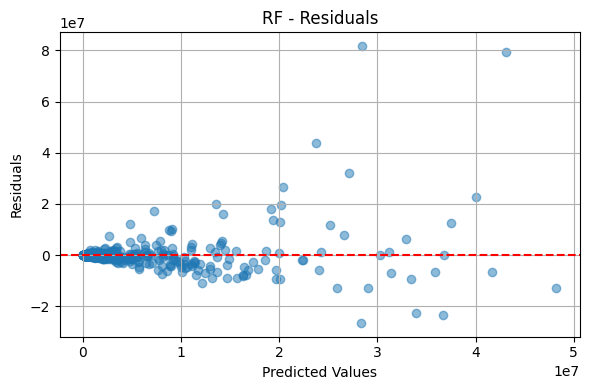

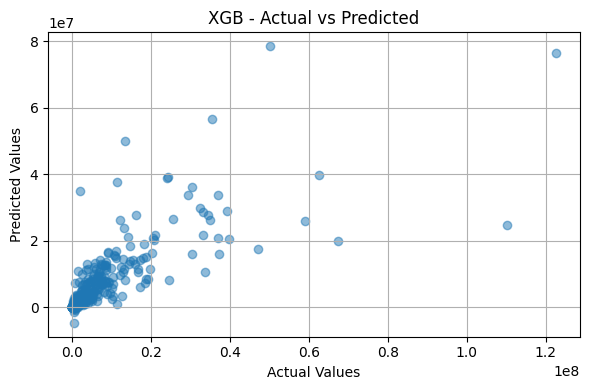

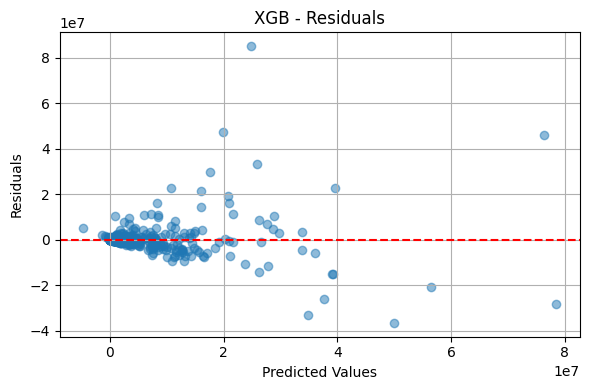

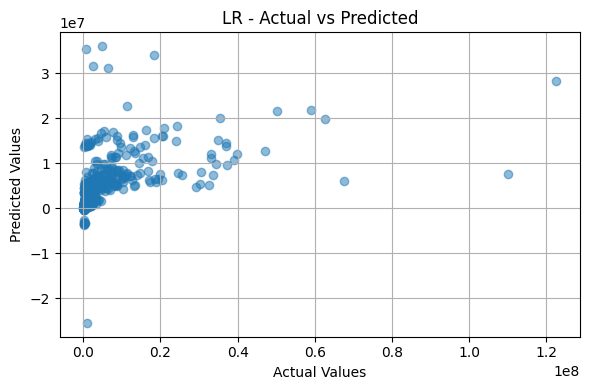

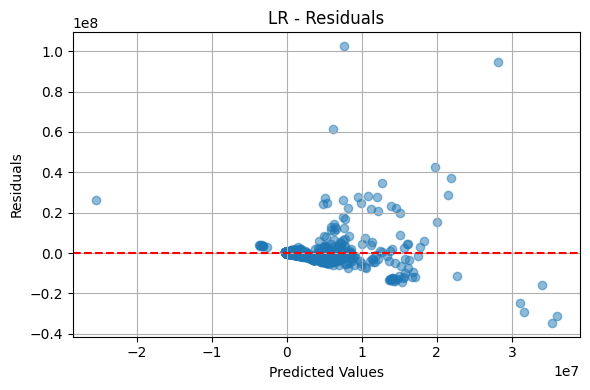

In [23]:
import time

# Store runtime and performance metrics
runtime_results = []
mse_results = []

# Evaluate each model
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    # Calculate runtime and MSE
    runtime = round(end_time - start_time, 4)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    runtime_results.append({"Model": model_name, "Runtime (s)": runtime})
    mse_results.append({"Model": model_name, "MSE": mse})

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{model_name.lower().replace(' ', '_')}_actual_vs_predicted.png")

    # Scatter plot: Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} - Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{model_name.lower().replace(' ', '_')}_residuals.png")

# Save runtime and MSE results to CSV
pd.DataFrame(runtime_results).to_csv("model_runtime_comparison.csv", index=False)
pd.DataFrame(mse_results).to_csv("model_mse_comparison.csv", index=False)